In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
raw_data = pd.read_csv('classified_data.csv')
raw_data

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [7]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [8]:
raw_data.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

In [12]:
 from sklearn.model_selection import train_test_split

In [13]:
x = scaled_data
y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [14]:
 from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

In [15]:
predictions = model.predict(x_test_data)

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       149
           1       0.93      0.90      0.91       151

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[[138  11]
 [ 15 136]]


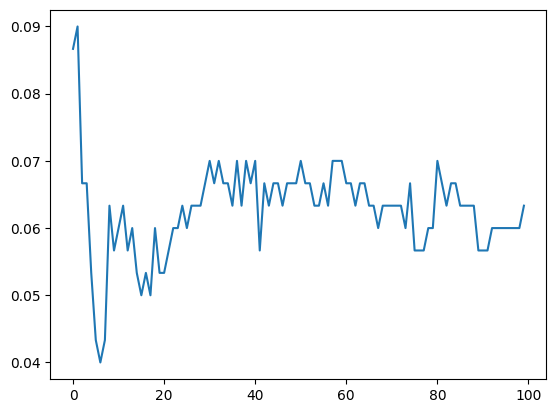

In [17]:
error_rates = []

for i in np.arange(1, 101):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(x_training_data, y_training_data)
    new_predictions = new_model.predict(x_test_data)
    error_rates.append(np.mean(new_predictions != y_test_data))

plt.plot(error_rates);

In [18]:
from sklearn.datasets import make_blobs

raw_data = make_blobs(
    n_samples=200, 
    n_features=2, 
    centers=4, 
    cluster_std=1.8
)

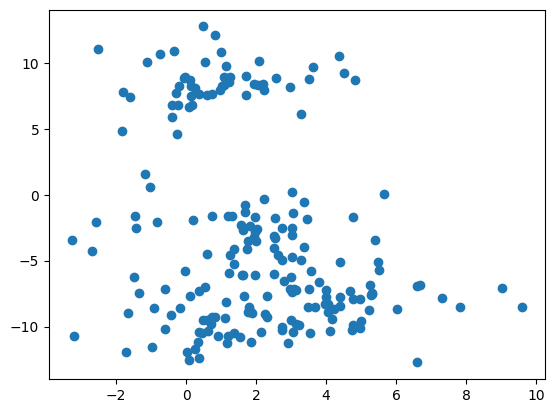

In [19]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1]);

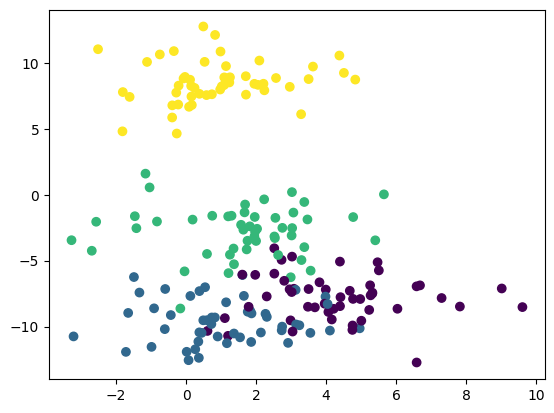

In [20]:
plt.scatter(raw_data[0][:,0], raw_data[0][:,1], c=raw_data[1]);

In [21]:
 from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(raw_data[0])

KMeans(n_clusters=4)

In [22]:
model.labels_

array([0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 3, 2, 0, 3, 2, 2, 3, 1, 1,
       3, 1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 3,
       3, 1, 3, 2, 2, 0, 3, 1, 2, 1, 3, 1, 3, 0, 0, 3, 2, 3, 1, 1, 2, 0,
       1, 1, 1, 3, 2, 3, 1, 1, 0, 3, 1, 2, 2, 2, 3, 2, 3, 1, 3, 2, 0, 2,
       3, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 0, 1, 3, 2, 2, 0, 1, 1, 3, 2,
       1, 3, 0, 1, 1, 0, 2, 3, 3, 0, 2, 0, 2, 2, 2, 0, 3, 2, 0, 1, 3, 3,
       3, 1, 3, 3, 2, 1, 2, 0, 0, 2, 2, 0, 3, 2, 1, 2, 0, 3, 1, 0, 3, 1,
       0, 3, 1, 0, 3, 0, 0, 3, 0, 0, 3, 2, 0, 3, 2, 2, 1, 0, 1, 2, 2, 2,
       1, 1, 0, 1, 0, 0, 3, 2, 0, 3, 1, 3, 3, 1, 1, 2, 0, 3, 1, 1, 1, 1,
       3, 3], dtype=int32)

In [23]:
model.cluster_centers_

array([[ 0.90203725,  8.51678897],
       [ 4.55694279, -7.9818353 ],
       [ 1.63036279, -2.81206429],
       [ 0.66407303, -9.72939531]])

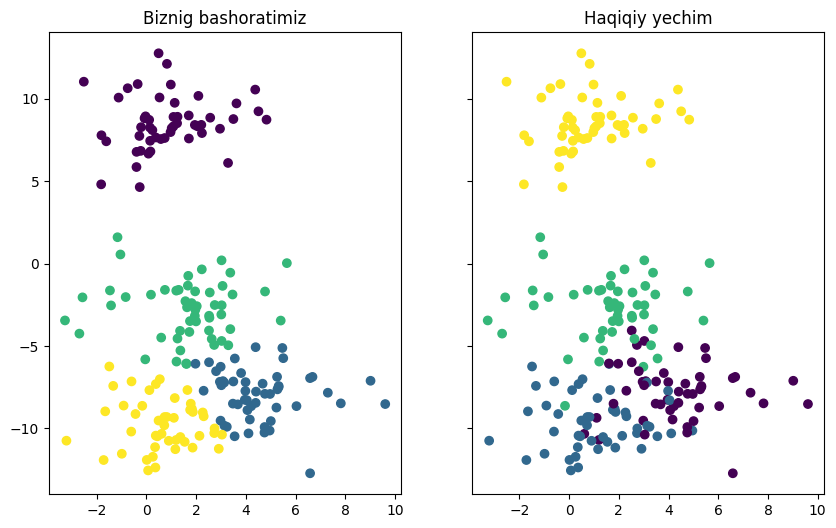

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('Biznig bashoratimiz')
ax1.scatter(raw_data[0][:,0], raw_data[0][:,1],c=model.labels_)
ax2.set_title('Haqiqiy yechim')
ax2.scatter(raw_data[0][:,0], raw_data[0][:,1],c=raw_data[1]);